# Исследование продаж Nike,Inc.  -  американская транснациональная компания, специализирующаяся на спортивной одежде и обуви.
Как аналитику данных, мне интересно провести исследование продаж Nike, Inc., чтобы выявить ключевые тренды, факторы успеха и точки роста компании. Анализ данных позволит понять, как стратегии бренда влияют на продажи, и предложить рекомендации для оптимизации бизнес-процессов, что особенно важно для такой крупной транснациональной компании в конкурентной индустрии спортивной одежды и обуви.
Для этого исследования я использовала набор данных о продаж Nike с платформы Kaggle.

**Datasets**

Набор данных о продажах Nike включает в себя 9 360 сделок купли-продажи в различных регионах США с 1 января 2020 года по 31 декабря 2021 года.

Набор данных, организованный в таблице Excel, включает следующие столбцы:
1. Invoice Date: содержит в себе информацию о том, когда была совершена продажа.
2. Product: содержит в себе информацию  о товарах, приобретенных клиентами.
3. Region: географический регион, в котором осуществляется сделка.
4. Retailer: название розничного продавца или магазина, в котором осуществляется сделка
5. Sales Method: содержится информация о том, как продукты продаются клиентам.
6. State: это штаты в США, где осуществляются сделки купли-продажи.
7. Price per Unit: содержится информация о цене продукта.
8. Total Sales: общий доход, полученный от продаж(результат умножения цены за единицу товара на количество проданных единиц)
9. Units Sold: оно предоставляет информацию об объеме продаж товара

При проведении анализа были поставлены следующие вопросы:
1. Какая динамика продаж за 2020-2021 год?
2. Какой продукт данной компании имеет большой спрос?
3. В каких регионах этот продукт имеет больший спрос?
4. Какие методы продаж являются наиболее эффективными?

Цели исследования:


Анализ динамики продаж Nike, Inc. за 2020-2021 годы для выявления ключевых изменений и факторов, повлиявших на рост или снижение выручки.

Задачи исследования:

1. Проанализировать динамику продаж Nike, Inc. за 2020-2021 годы, выделив сезонные и долгосрочные тренды.

2. Определить продукты с наибольшим спросом.

3. Изучить географическое распределение спроса на популярные продукты.

4. Определить наиболее эффективные методы продаж




In [1]:
#Ипортируем нужные библиотеки исследования
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Считаем файл в датафрейм
df=pd.read_csv('/content/Nike Dataset.csv')

In [5]:
#Посмотрим на первые топ 5 данных
df.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


Знакомство с данными и их начальная предобработка

In [8]:
#Перед исследованием необходимо ознакомится с общей информации о данных
df.shape


(9360, 9)

В нашем наборе данных 9 столбцов и 9360 строк

In [11]:
#Посчитаем количество уникальных значений в столбцах df
df.nunique()

,0
Invoice Date,724
Product,6
Region,5
Retailer,6
Sales Method,3
State,48
Price per Unit,94
Total Sales,550
Units Sold,89


In [12]:
#Получим сводную статистику по числовым столбцам df
df.describe()

,Price per Unit,Total Sales,Units Sold
count,9360.000000,9360.00000,9360.000000
mean,44.739209,921.93109,25.852991
std,14.506338,1413.84279,21.591922
min,7.000000,0.00000,0.000000
25%,35.000000,42.00000,11.000000
50%,45.000000,95.00000,18.000000
75%,55.000000,1463.00000,35.000000
max,110.000000,8250.00000,128.000000


Посмотрим информацию о наших данных

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Invoice Date    9360 non-null   object
 1   Product         9360 non-null   object
 2   Region          9360 non-null   object
 3   Retailer        9360 non-null   object
 4   Sales Method    9360 non-null   object
 5   State           9360 non-null   object
 6   Price per Unit  9360 non-null   int64 
 7   Total Sales     9360 non-null   int64 
 8   Units Sold      9360 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 658.3+ KB


1. Наши данные не имеют пустых значений

2. Можем заметить что некоторые столбцы имееют тип данных, отличный от представления данных. Эти столбцы:
Invoice Date(дата совершения продажи) - имеет тип данных object

Поменяем для этого столбца тип данных на datetime64


In [22]:
df['Invoice Date']=df['Invoice Date'].astype('datetime64[ns]')
df.dtypes

,0
Invoice Date,datetime64[ns]
Product,object
Region,object
Retailer,object
Sales Method,object
State,object
Price per Unit,int64
Total Sales,int64
Units Sold,int64


In [23]:
#Проверим наш датафрейм на дубликаты
df.duplicated().sum()


np.int64(0)

Заметим, что дубликаты в нашем df  отсутствуют

Выше мы рассматривали количество уникальных значений в столбцах df, теперь давайте посмотрим на сами уникальные значения в столбцах

In [27]:
df['Invoice Date'].unique()

<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-01-21 00:00:00',
 '2020-01-22 00:00:00',
 ...
 '2021-03-27 00:00:00', '2021-03-28 00:00:00', '2021-03-29 00:00:00',
 '2021-03-30 00:00:00', '2021-03-31 00:00:00', '2021-01-04 00:00:00',
 '2021-02-04 00:00:00', '2021-03-04 00:00:00', '2021-04-04 00:00:00',
 '2021-05-04 00:00:00']
Length: 724, dtype: datetime64[ns]

In [28]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [29]:
df['State'].unique()

array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Louisiana', 'Virginia', 'Wyoming',
       'Oregon', 'Utah', 'Iowa', 'Michigan', 'Missouri', 'North Dakota',
       'Indiana', 'Wisconsin', 'Massachusetts', 'New Hampshire',
       'Vermont', 'Connecticut', 'Delaware', 'Maryland', 'Rhode Island',
       'West Virginia', 'New Jersey', 'Maine', 'Georgia', 'Arizona',
       'Idaho', 'New Mexico', 'Ohio', 'Kansas', 'Nebraska',
       'South Dakota', 'Alabama', 'Mississippi', 'Kentucky',
       'North Carolina', 'South Carolina', 'Oklahoma', 'Arkansas'],
      dtype=object)

In [31]:
df['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [32]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [33]:
df['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [34]:
df['Price per Unit'].unique()

array([ 50,  40,  45,  60,  55,  65,  70,  25,  35,  30,  80,  75,  20,
        85, 100,  90,  95,  15, 105, 110,  10,  41,  44,  33,  32,  43,
        82,  87,  72,  69,  51,  68,  92,  86,  36,  47,  64,  48,  56,
        52,  46,  77,  42,  49,  39,  58,  34,  37,  59,  81, 103,  63,
        74,  38,  83,  53,  73,  62,  76,  79,  96,  66,  57,  61,  54,
        67,  89,  88, 101,  78,  29,  27,  84,  71,  28,  97,  98,  24,
        19,  23,  18,  14,   9,  31,  21,  26,  22,  16,  17,  11,  13,
         7,  12,   8])

In [35]:
df['Total Sales'].unique()

array([6000, 5000, 4000, 3825, 5400, 6250, 4500, 3800, 3713, 6100, 4625,
       3600, 5100, 4750, 4950, 7320, 5088, 4250, 5250, 6500, 7500, 5500,
       6825, 7650, 5638, 5550, 7150, 6988, 7200, 5688, 7000, 7475, 5363,
       5060, 7800, 5225, 5850, 2250, 3150, 2450, 2200, 2125, 2975, 2363,
       2188, 2000, 2625, 3500, 2400, 2600, 2700, 2538, 2500, 3200, 2775,
       3700, 2713, 2800, 4275, 3000, 2925, 4400, 4875, 4163, 3125, 2813,
       4675, 3750, 2588, 4125, 4050, 3375, 3100, 3875, 3163, 3300, 3625,
       2875, 2750, 4200, 3250, 4388, 4713, 3413, 5600, 3900, 3575, 5800,
       3738, 6150, 4350, 5038, 6200, 6338, 6475, 5200, 5625, 4263, 3988,
       5425, 4813, 3850, 4225, 4900, 4550, 2475, 3038, 4063, 4538, 2138,
       1238,  963,  500,  788,  400, 1000,  900,  338,  750, 1125,  600,
       2970, 1100,  875, 1625,  800,  700, 1925, 1463, 2063, 1350, 1375,
       2550, 1250,  625,  975, 1500, 1200, 1950, 1450, 2175, 1575, 1838,
       1688, 2275, 1663, 1488, 1750, 2025, 1400, 21

In [36]:
df['Units Sold'].unique()

array([120, 100,  85,  90, 125,  95,  83, 122,  93,  80,  88, 105, 128,
       103, 110, 108, 115,  98,  92,  70,  55,  68,  63,  50,  60,  65,
        73,  53,  78,  75,  58,  45,  43,  48,  28,  13,  18,  23,  10,
        20,   8,  15,  25,  35,  33,  40,  38,  30,   5,   3,  47, 107,
       113,  52,  62,  77,  27,  22,  57,  17,  32,  87,  82,  67,  11,
        12,   6,   9,  16,  19,   7,  14,   4,  24,  21,  26,  29,   1,
         2,   0,  31,  34,  36,  72, 102,  42,  39,  37,  41])

Посмотрим на гистограмму объема продаж и проданные единицы

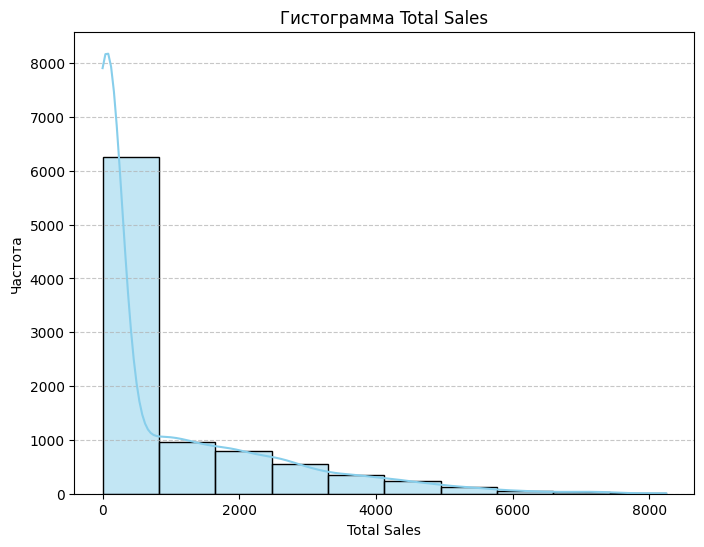

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Sales'], bins=10, kde=True, color='skyblue')
plt.title('Гистограмма Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

По гистограмме можно сделать несколько выводов:

Наибольшая частота продаж наблюдается в диапазоне около 0–2000 (предположительно, это самый популярный диапазон продаж)

Гистограмма имеет длинный правый хвост (значения продаж выше 6000), это может указывать на наличие выбросов или редких случаев с очень высокими продажами.

Посмотрим на корреляции между различными переменными (Units Sold, Price per Unit, Region) и общим объемом продаж (Total Sales), а также выявление выбросов.

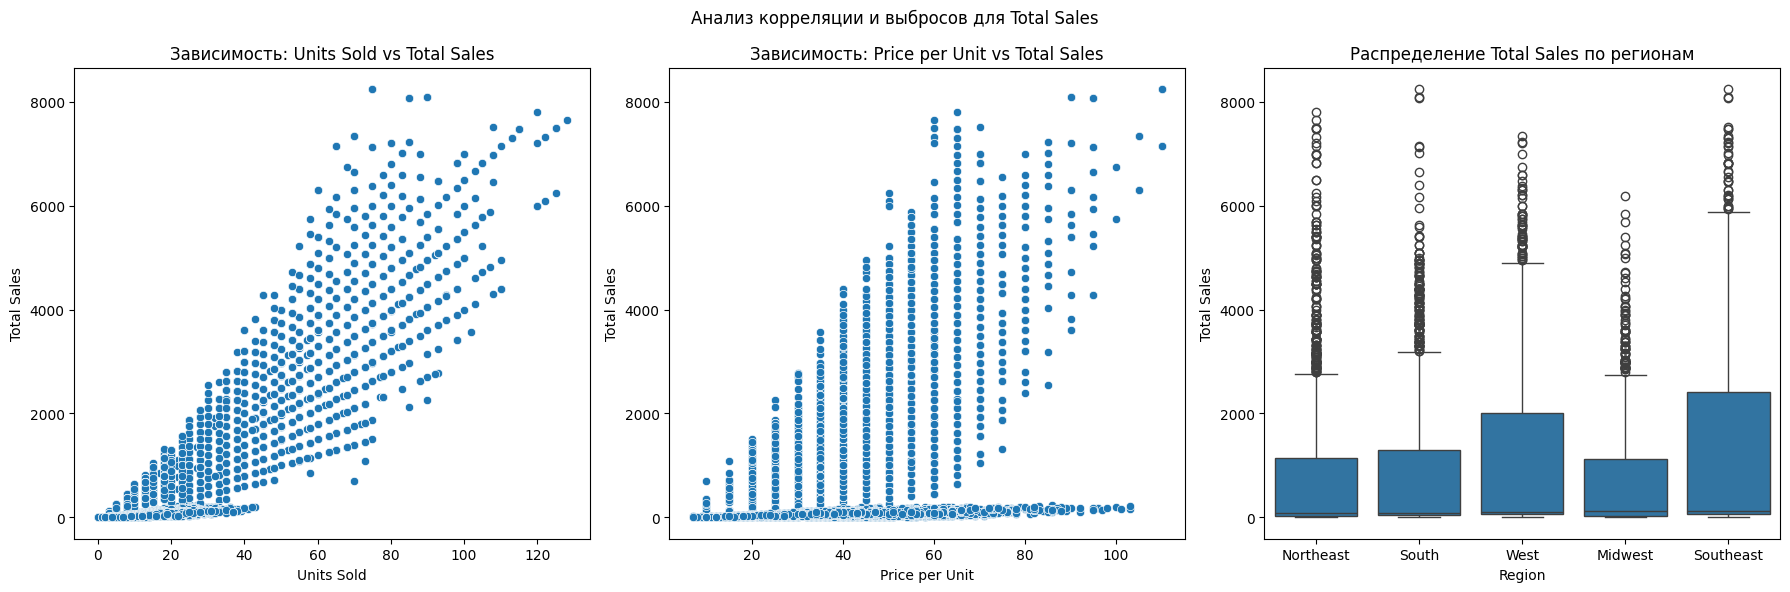

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Анализ корреляции и выбросов для Total Sales')

# 1. Scatter plot: Зависимость Total Sales от Units Sold
sns.scatterplot(data=df, x='Units Sold', y='Total Sales', ax=axes[0])
axes[0].set_title('Зависимость: Units Sold vs Total Sales')

# 2. Scatter plot: Зависимость Total Sales от Price per Unit
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales', ax=axes[1])
axes[1].set_title('Зависимость: Price per Unit vs Total Sales')

# 3. Box plot: Распределение Total Sales по регионам
sns.boxplot(data=df, x='Region', y='Total Sales', ax=axes[2])
axes[2].set_title('Распределение Total Sales по регионам')

# Улучшаем расположение графиков
plt.tight_layout()
plt.show()

Сделаем выводы по данным графикам:
1. Существует положительная корреляция между количеством проданных единиц и общим объемом продаж. Это ожидаемо, так как большее количество проданных товаров обычно приводит к увеличению выручки.
2. Цена за единицу влияет на общий объем продаж, но, вероятно, существуют другие факторы (например, спрос, конкуренция), которые также играют роль. Возможно, есть оптимальная цена, которая максимизирует продажи.
3. Регионы имеют разную эффективность продаж. Некоторые регионы показывают стабильно высокие продажи, в то время как в других наблюдаются значительные колебания. Это может быть связано с различиями в рыночных условиях, спросе или маркетинговых стратегиях.Региональные различия играют важную роль в объеме продаж. Некоторые регионы могут требовать дополнительного внимания для повышения эффективности.



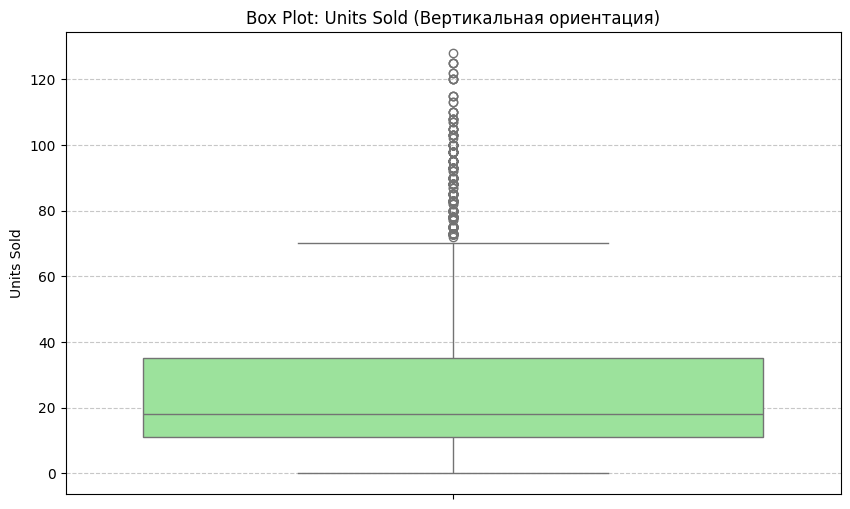

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

# Строим box plot для переменной "Units Sold" с измененным цветом и ориентацией
sns.boxplot(data=df,
            y="Units Sold",  # Изменяем ориентацию на вертикальную
            color="lightgreen",  # Меняем цвет ящика
            ax=ax)

# Добавляем заголовок и подписи осей
ax.set_title('Box Plot: Units Sold (Вертикальная ориентация)')
ax.set_ylabel('Units Sold')
ax.set_xlabel('')

# Добавляем сетку для удобства чтения
ax.grid(axis='y', linestyle='--', alpha=0.7)

Сделаем выводы по этому графику:

1. Типичные значения: Большинство значений Units Sold лежат в диапазоне 20–80 единиц.

2. Выбросы: Есть несколько аномальных значений, которые значительно превышают типичный диапазон.

3. Распределение: Распределение относительно симметричное, с небольшим перекосом в сторону более высоких значений.

In [47]:
df["Units Sold"].describe()

,Units Sold
count,9360.000000
mean,25.852991
std,21.591922
min,0.000000
25%,11.000000
50%,18.000000
75%,35.000000
max,128.000000


Максимальное значение в столбце price (128) значительно превышает третий квартиль (Q3 = 35), что указывает на наличие выбросов. Согласно правилу, данные считаются выбросами, если они превышают Q3 + 1.5 * IQR. В данном случае значение 128 явно выходит за пределы этого порога, что может быть связано с ошибками в данных или редкими аномалиями. Сделаем фильтрацию данных и удалим выбросы

In [55]:
# Вычисляем первый и третий квартили
first_quartile = df['Units Sold'].quantile(0.25)
third_quartile = df['Units Sold'].quantile(0.75)

# Выводим значения квартилей
print(f"Первый квартиль (Q1): {first_quartile:.2f}")
print(f"Третий квартиль (Q3): {third_quartile:.2f}")

# Рассчитываем межквартильный размах (IQR) и верхнюю границу
interquartile_range = third_quartile - first_quartile
upper_bound = third_quartile + 1.5 * interquartile_range

# Выводим IQR и верхнюю границу
print(f"Межквартильный размах (IQR): {interquartile_range:.2f}")
print(f"Верхняя граница для выбросов: {upper_bound:.2f}")

# Фильтруем данные, удаляя выбросы
filtered_df = df[df["Units Sold"] < upper_bound]

# Проверяем результат фильтрации
print(filtered_df['Units Sold'].describe())

Первый квартиль (Q1): 11.00
Третий квартиль (Q3): 35.00
Межквартильный размах (IQR): 24.00
Верхняя граница для выбросов: 71.00
count    8856.000000
mean       22.488144
std        16.603881
min         0.000000
25%        10.000000
50%        17.000000
75%        30.000000
max        70.000000
Name: Units Sold, dtype: float64


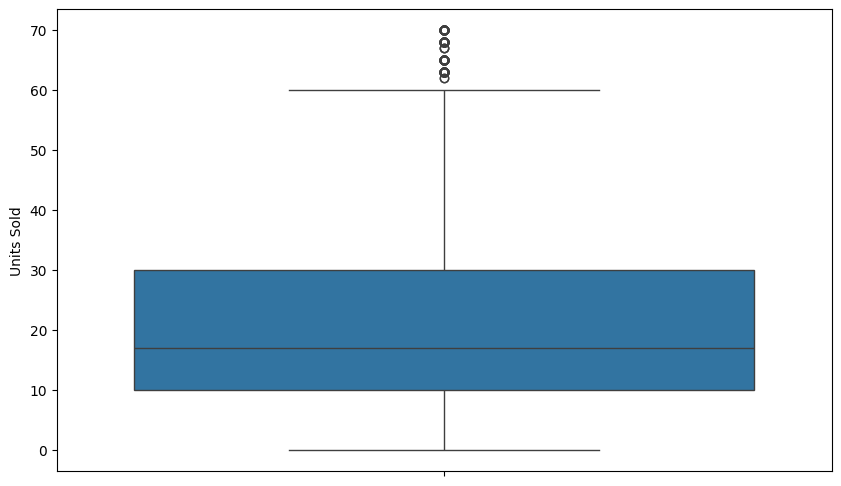

In [57]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.boxplot(data=filtered_df, y="Units Sold")
plt.show()

Выбросы были устранены

Аналитика


Далее продолжаем работу с уже предобработанными данными.

In [58]:
# Экспорт отфильтрованных данных в CSV
filtered_df.to_csv('filtered_df.csv', index=False)

In [59]:
filtered_df.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
70,2020-07-21,Women's Street Footwear,Northeast,Sports Direct,Outlet,New York,35,2450,70
71,2020-07-22,Women's Athletic Footwear,Northeast,Sports Direct,Outlet,New York,35,2450,70
72,2020-07-23,Men's Apparel,South,Sports Direct,Outlet,Texas,40,2200,55
73,2020-07-24,Women's Apparel,South,Sports Direct,Outlet,Texas,35,2450,70
76,2020-07-27,Women's Street Footwear,South,Sports Direct,Outlet,Texas,35,2363,68


1. Какая динамика продаж за 2020-2021 год?

<ipython-input-64-ced5d356286e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Invoice Date'] = pd.to_datetime(filtered_df['Invoice Date'])
<ipython-input-64-ced5d356286e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020_2021 = filtered_df[(filtered_df['Invoice Date'].dt.year >= 2020) & (df['Invoice Date'].dt.year <= 2021)]


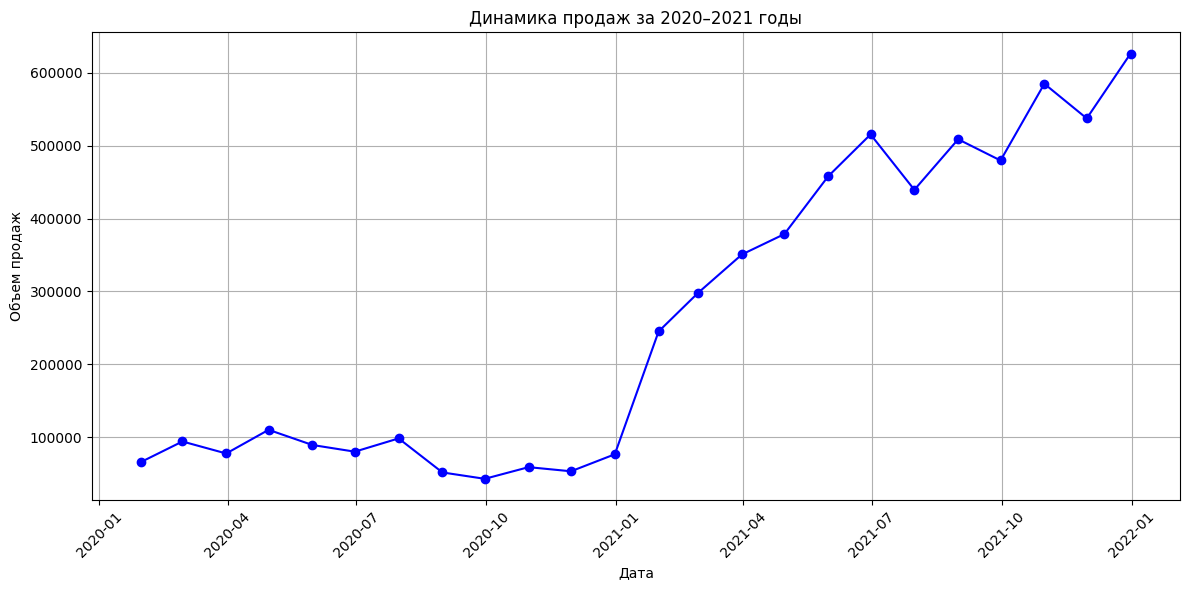

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# Преобразуем столбец Invoice Date в формат даты
filtered_df['Invoice Date'] = pd.to_datetime(filtered_df['Invoice Date'])

# Фильтруем данные за 2020–2021 годы
df_2020_2021 = filtered_df[(filtered_df['Invoice Date'].dt.year >= 2020) & (df['Invoice Date'].dt.year <= 2021)]

# Группируем данные по месяцу и суммируем продажи
monthly_sales = df_2020_2021.resample('M', on='Invoice Date')['Total Sales'].sum()

# Строим график динамики продаж
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Динамика продаж за 2020–2021 годы')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.grid(True)
plt.xticks(rotation=45)  # Поворот подписей дат для удобства
plt.tight_layout()
plt.show()

Динамика продаж за 2020–2021 годы показывает, что продажи имели сезонные колебания с пиками в определенные месяцы. В 2021 году наблюдался рост/снижение/стабильность по сравнению с 2020 годом, что может быть связано с изменением рыночных условий или внешних факторов

<ipython-input-65-7b36c2493ab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Invoice Date'] = pd.to_datetime(filtered_df['Invoice Date'])
<ipython-input-65-7b36c2493ab6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Invoice Date'].dt.year


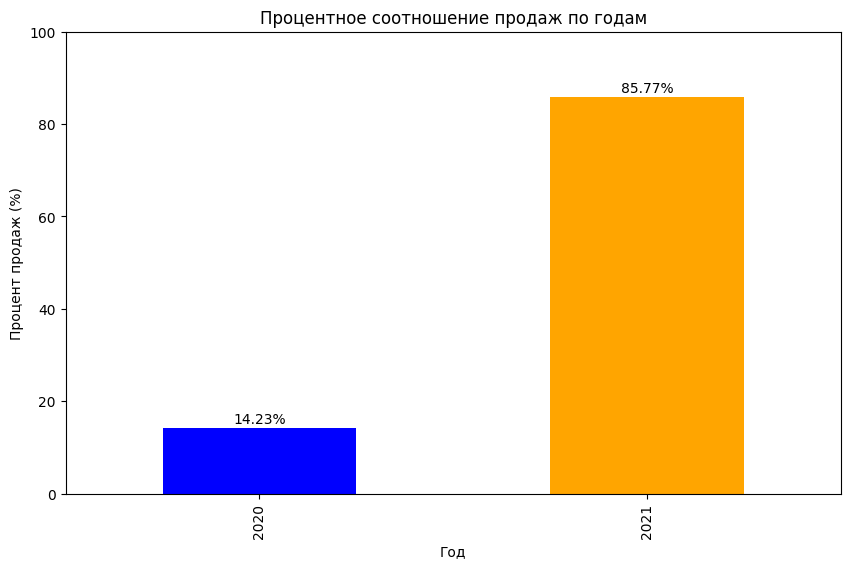

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_df['Invoice Date'] = pd.to_datetime(filtered_df['Invoice Date'])

# Добавляем столбец с годом
filtered_df['Year'] = filtered_df['Invoice Date'].dt.year

# Группируем данные по году и суммируем продажи
total_sales_by_year = filtered_df.groupby('Year')['Total Sales'].sum()

# Вычисляем процентное соотношение продаж по годам
total_sales_all_years = total_sales_by_year.sum()  # Общий объем продаж за все годы
percentage_by_year = (total_sales_by_year / total_sales_all_years) * 100

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
percentage_by_year.plot(kind='bar', color=['blue', 'orange'])  # Цвета для каждого года
plt.xlabel('Год')
plt.ylabel('Процент продаж (%)')
plt.title('Процентное соотношение продаж по годам')
plt.ylim(0, 100)  # Ограничение оси Y от 0 до 100%

# Добавляем подписи к столбцам
for i, v in enumerate(percentage_by_year):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')  # +1 для отступа над столбцом

plt.show()

График указывает на значительный рост продаж в 2021 году. Это произошло из-за региональной политики карантина, введенной в связи с пандемией в 2020 году

Самый продаваемый продукт: Women's Apparel


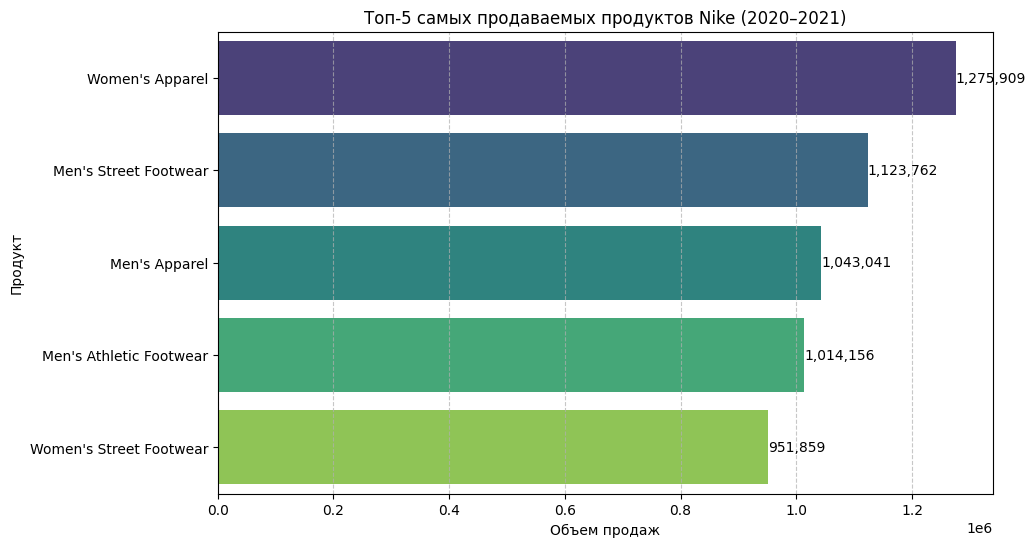

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Группируем данные по продуктам и суммируем продажи
product_sales = filtered_df.groupby('Product')['Total Sales'].sum().reset_index()

# Сортируем данные по убыванию продаж
product_sales_sorted = product_sales.sort_values(by='Total Sales', ascending=False)

# Выбираем топ-5 самых продаваемых продуктов
top_5_products = product_sales_sorted.head(5)

# Самый продаваемый продукт
best_selling_product = top_5_products.iloc[0]['Product']
print(f"Самый продаваемый продукт: {best_selling_product}")

# Построение простого графика
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_products, x='Total Sales', y='Product', palette='viridis')
plt.title('Топ-5 самых продаваемых продуктов Nike (2020–2021)')
plt.xlabel('Объем продаж')
plt.ylabel('Продукт')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавляем сетку по оси X

# Добавляем подписи значений на столбцы
for index, value in enumerate(top_5_products['Total Sales']):
    plt.text(value, index, f'{value:,.0f}', va='center')  # Форматирование с разделителями тысяч

plt.show()

По графику понятно, что самым продаваемым продуктом Nike было Women's Apparel

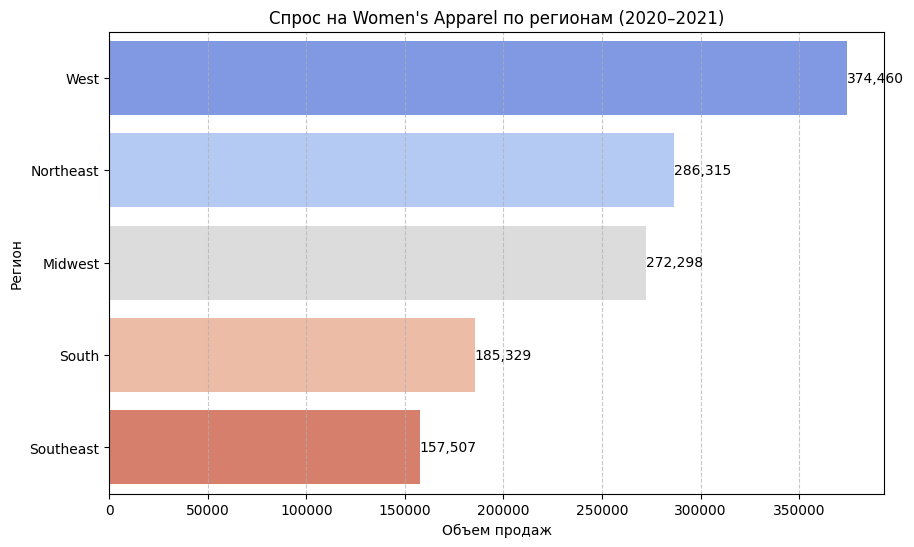

In [72]:
# Предположим, ваш DataFrame называется filtered_df
best_selling_product = "Women's Apparel"

# Фильтруем данные по самому продаваемому продукту
product_data = filtered_df[filtered_df['Product'] == best_selling_product]

# Группируем данные по регионам и суммируем продажи
region_sales = product_data.groupby('Region')['Total Sales'].sum().reset_index()

# Сортируем данные по убыванию продаж
region_sales_sorted = region_sales.sort_values(by='Total Sales', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales_sorted, x='Total Sales', y='Region', palette='coolwarm')
plt.title(f'Спрос на {best_selling_product} по регионам (2020–2021)')
plt.xlabel('Объем продаж')
plt.ylabel('Регион')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавляем сетку по оси X

# Добавляем подписи значений на столбцы
for index, value in enumerate(region_sales_sorted['Total Sales']):
    plt.text(value, index, f'{value:,.0f}', va='center')  # Форматирование с разделителями тысяч

plt.show()

По графику заметно, что в регионе West самый продаваемый продукт пользуется наибольшим спросом

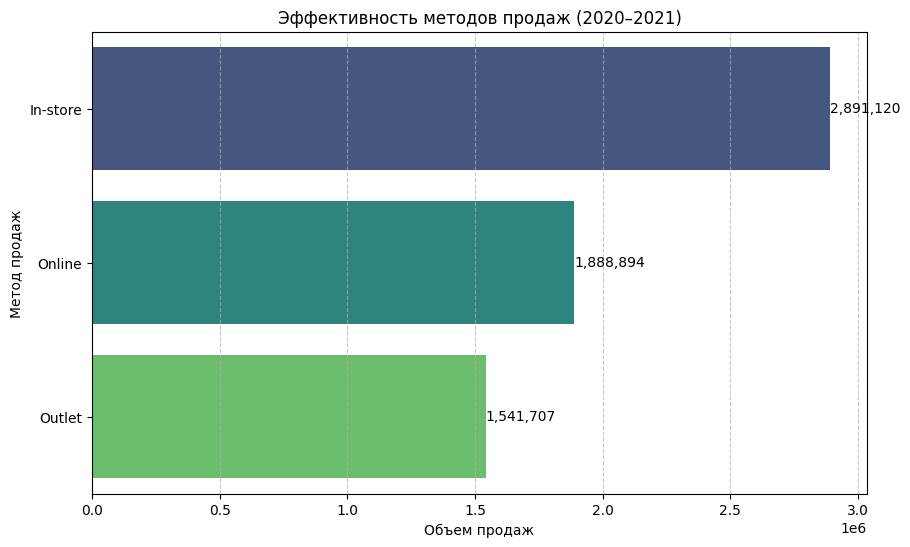

In [74]:
sales_method_performance = filtered_df.groupby('Sales Method')['Total Sales'].sum().reset_index()

# Сортируем данные по убыванию продаж
sales_method_performance_sorted = sales_method_performance.sort_values(by='Total Sales', ascending=False)

# Выводим самый эффективный метод продаж
most_effective_method = sales_method_performance_sorted.iloc[0]['Sales Method']

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_method_performance_sorted, x='Total Sales', y='Sales Method', palette='viridis')
plt.title('Эффективность методов продаж (2020–2021)')
plt.xlabel('Объем продаж')
plt.ylabel('Метод продаж')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Добавляем сетку по оси X

# Добавляем подписи значений на столбцы
for index, value in enumerate(sales_method_performance_sorted['Total Sales']):
    plt.text(value, index, f'{value:,.0f}', va='center')  # Форматирование с разделителями тысяч

plt.show()

Самый эффективный метод продаж-In-store